# Phase I: CPTAC BRCA Dataset Exploration

**Objective:** This notebook covers the initial exploratory data analysis (EDA) of the CPTAC BRCA dataset. The goals are to:
1. Load and integrate the different data files (proteomics, clinical, phenotype, survival).
2. Summarize key features, distributions, and imbalances.
3. Split the dataset into training, validation, and test sets for future modeling.
4. Visualize distributions across the splits to ensure they are representative.

## 1. Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# // Set plot style
sns.set_style("whitegrid")

## 2. Load Data

Load the four primary data files. We assume they are tab-separated.

In [10]:
try:
    proteomics_df = pd.read_csv('BRCA_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt', sep='	',index_col=0)
except FileNotFoundError:
    print("Error: Proteomics file not found. Please ensure the file is downloaded in the correct directory.")
    proteomics_df = None

meta_df = pd.read_csv('BRCA_meta.txt', sep='	',index_col=0)
phenotype_df = pd.read_csv('BRCA_phenotype.txt', sep='	',index_col=0)
survival_df = pd.read_csv('BRCA_survival.txt', sep='	',index_col=0)

if proteomics_df is not None:
    print("Proteomics Data Shape:", proteomics_df.shape)
print("Metadata Shape:", meta_df.shape)
print("Phenotype Data Shape:", phenotype_df.shape)
print("Survival Data Shape:", survival_df.shape)

Proteomics Data Shape: (12022, 122)
Metadata Shape: (123, 14)
Phenotype Data Shape: (122, 180)
Survival Data Shape: (122, 4)


In [11]:
meta_df

,Age,Sex,Tumor_Size_cm,Histologic_Grade,Tumor_necrosis,Path_Stage_pT,Path_Stage_pN,Stage,BMI,Tobacco_smoking_history,MAP3K1_mutation,GATA3_mutation,PIK3CA_mutation,TP53_mutation
case_id,,,,,,,,,,,,,,
data_type,CON,BIN,CON,ORD,BIN,ORD,ORD,ORD,CON,ORD,BIN,BIN,BIN,BIN
01BR001,55,Female,NaN,NaN,NaN,pT2,pN1,Stage II,NaN,NaN,0,0,0,0
01BR015,35,Female,NaN,NaN,NaN,pT2,pN1,Stage II,NaN,NaN,0,0,1,1
01BR017,45,Female,NaN,NaN,NaN,pT3,pN1,Stage III,NaN,NaN,0,0,0,1
01BR018,66,Female,NaN,NaN,NaN,pT3,pN1,Stage III,NaN,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01BR008,48,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
01BR009,64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
01BR010,65,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0


In [12]:
#transpose it into 122(samples) * 12022(proteins)
meta_df = meta_df[1:]
proteomics_df = proteomics_df.T
proteomics_df

idx,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.12,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000283599.2,ENSG00000283632.3,ENSG00000284024.2,ENSG00000284194.3,ENSG00000284691.1,ENSG00000284753.2,ENSG00000285025.1,ENSG00000285723.1,ENSG00000286053.1,ENSG00000286140.1
11BR047,23.536230,NaN,26.037709,23.574738,18.228407,19.571458,28.953397,24.520221,25.483997,22.656713,...,NaN,21.097525,16.818661,23.558998,17.100204,19.129039,21.648042,21.818995,22.558221,23.466205
11BR043,21.667211,NaN,25.651781,23.921688,18.947025,20.039619,28.597240,23.606031,25.693878,23.036831,...,NaN,20.237673,16.608385,24.755413,17.772541,20.137307,21.996900,23.093035,22.739103,24.440520
11BR049,22.484736,NaN,25.980302,23.894719,19.422939,19.929467,28.514227,24.500181,25.851749,23.107285,...,NaN,20.206928,16.910400,24.248926,17.089203,19.716031,21.068699,22.134389,22.622874,24.082548
11BR023,22.634519,NaN,25.225479,23.089085,19.522822,20.240864,28.463746,24.214018,25.852562,23.084945,...,NaN,20.028211,17.338752,23.899449,17.352952,20.039873,21.622513,22.827876,22.955656,24.078677
18BR010,22.246917,NaN,25.992452,23.465635,18.471002,19.971499,29.148109,24.429975,25.443463,23.171204,...,NaN,21.119919,16.732230,24.466067,16.335638,19.898370,21.418864,22.540802,22.338423,23.875890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01BR020,21.420225,NaN,25.616726,23.462971,NaN,19.988037,28.742071,24.472267,25.352429,23.234187,...,NaN,20.919638,NaN,24.637872,16.579486,19.865030,21.700846,23.062634,23.699254,24.419484
20BR006,22.408042,NaN,25.452848,23.762129,NaN,19.547153,29.007893,24.031310,25.785397,23.861266,...,NaN,20.870861,NaN,24.774113,17.026642,20.457982,21.913802,22.663729,22.740161,24.176109
09BR001,22.857560,NaN,25.715871,24.042554,NaN,19.685251,28.548393,25.163796,25.482635,23.142178,...,NaN,20.639274,NaN,25.119836,16.414070,19.932347,21.675866,21.749961,22.173610,24.006488
03BR011,22.819791,NaN,26.004246,24.305859,NaN,19.486600,28.725695,24.948220,26.407320,23.200395,...,NaN,21.310186,NaN,24.645196,16.971705,19.574225,21.631067,22.695192,23.153465,23.880124


## 3. Initial Exploration: Missing Values and Distributions

Let's get a high-level overview of the data, focusing on missing values and the distribution of a key categorical feature.

In [13]:
#delete the gene with nan ratio > 0.3
nan_ratio = proteomics_df.isna().mean()
proteomics_df = proteomics_df.loc[:, nan_ratio <= 0.3]

#use mean value to fill the nan
proteomics_df = proteomics_df.fillna(proteomics_df.mean())

## 4. Data Integration

To create a unified dataset for analysis, we need to merge these files.

1.  **Transpose Proteomics Data:** The proteomics data has proteins as rows and samples as columns. We'll transpose it so that samples are rows.
2.  **Set Index:** We'll use the sample identifier as the index for all dataframes to facilitate merging.
3.  **Merge:** Combine all dataframes into a single master dataframe.

In [14]:
if proteomics_df is not None:
    # Merge the dataframes
    df = pd.concat([meta_df, phenotype_df, survival_df, proteomics_df], axis=1, join='inner')

    print("Shape of merged dataframe:", df.shape)
    display(df.head())

Shape of merged dataframe: (122, 9440)


,Age,Sex,Tumor_Size_cm,Histologic_Grade,Tumor_necrosis,Path_Stage_pT,Path_Stage_pN,Stage,BMI,Tobacco_smoking_history,...,ENSG00000280789.2,ENSG00000282122.1,ENSG00000282639.1,ENSG00000282651.2,ENSG00000283632.3,ENSG00000284194.3,ENSG00000285025.1,ENSG00000285723.1,ENSG00000286053.1,ENSG00000286140.1
01BR001,55,Female,NaN,NaN,NaN,pT2,pN1,Stage II,NaN,NaN,...,17.971315,16.746438,23.745322,24.674664,21.198267,24.694918,22.491715,22.379949,22.296395,24.666601
01BR015,35,Female,NaN,NaN,NaN,pT2,pN1,Stage II,NaN,NaN,...,18.005736,18.327572,24.028699,24.346395,20.703016,24.438832,22.510963,22.522759,22.527678,24.418651
01BR017,45,Female,NaN,NaN,NaN,pT3,pN1,Stage III,NaN,NaN,...,18.153190,22.618682,23.730304,23.004539,21.289673,24.476093,21.768897,23.095670,22.587695,23.783962
01BR018,66,Female,NaN,NaN,NaN,pT3,pN1,Stage III,NaN,NaN,...,17.800245,21.098158,24.672776,25.853536,20.892698,24.558006,21.922831,22.564385,22.272092,24.288024
01BR025,62,Female,NaN,NaN,NaN,pT3,pN1,Stage III,NaN,NaN,...,17.419766,21.204410,22.980324,23.434410,18.902956,24.948353,22.914983,22.742220,22.667832,23.855227


Percentage of missing values (top 20):
Tobacco_smoking_history    100.000000
Tumor_Size_cm              100.000000
Histologic_Grade           100.000000
Tumor_necrosis             100.000000
BMI                        100.000000
PFS_days                    22.131148
OS_days                     21.311475
OS_event                    18.852459
Path_Stage_pN               12.295082
Path_Stage_pT               11.475410
Stage                       10.655738
WES_purity                   9.836066
WES_ploidy                   9.836066
CNV_index_chr13              7.377049
CNV_index_chr7               7.377049
CNV_index_chr12              7.377049
CNV_index_chr11              7.377049
CNV_index_chr9               7.377049
CNV_index_chr8               7.377049
CNV_index_chr1               7.377049
dtype: float64


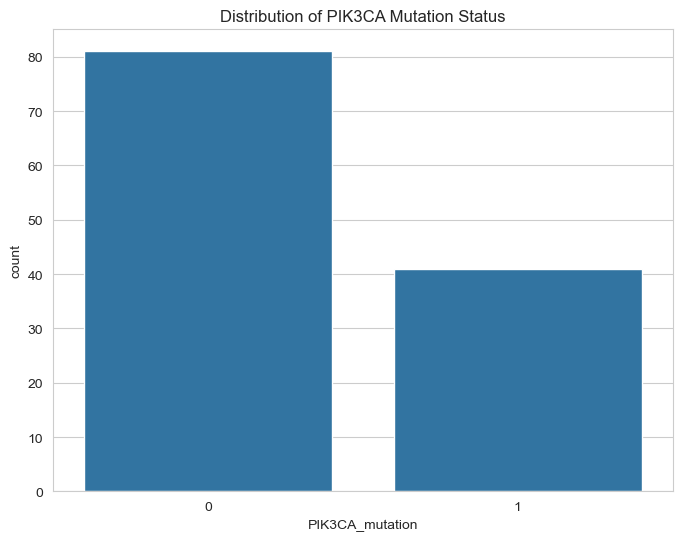

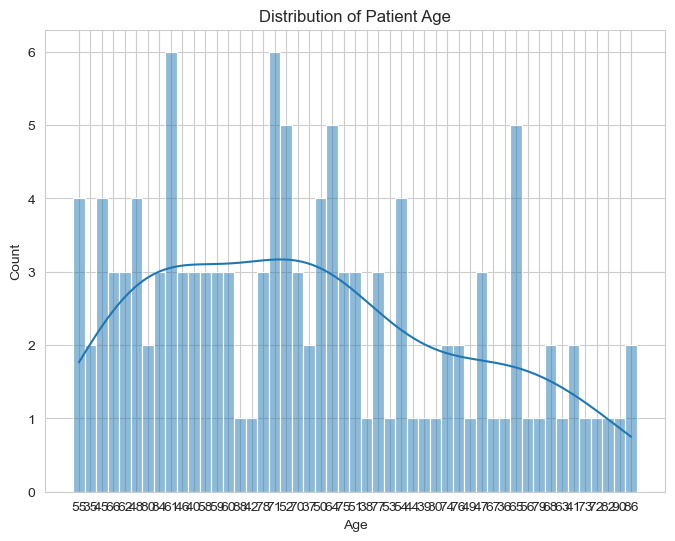

In [15]:
if 'df' in locals():
    # Check for missing values
    missing_values = df.isnull().sum() / len(df) * 100
    print("Percentage of missing values (top 20):")
    print(missing_values.sort_values(ascending=False).head(20))
    
    # Plot distribution of a key categorical variable (PIK3CA_mutation)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='PIK3CA_mutation', data=df)
    plt.title('Distribution of PIK3CA Mutation Status')
    plt.show()

    # Plot distribution of a continuous variable (Age)
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Age'].dropna(), kde=True, bins=30)
    plt.title('Distribution of Patient Age')
    plt.show()

## 5. Data Splitting

We will split the data into training (70%), validation (15%), and test (15%) sets. We'll use stratification on the `PIK3CA_mutation` status to ensure that the class proportions are maintained across all splits.

In [16]:
if 'df' in locals():
    # For demonstration, we'll drop rows where the target is missing
    df_clean = df.dropna(subset=['Stage'])
    
    # Define features (X) and target (y)
    # For this example, we'll use a subset of clinical features. For a real model, you'd use proteomics.
    all_proteins = list(proteomics_df.columns)
    feature_cols = all_proteins
    # Simple imputation for demonstration purposes
    for col in feature_cols:
        if df_clean[col].isnull().any():
            df_clean[col] = df_clean[col].fillna(df_clean[col].median()) 
            
    X = df_clean[feature_cols]
    y = list(df_clean['Stage'])

    # Split into training (60%) and temp (40%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

    # Split temp into validation (20%) and test (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    print(f"Training set shape: {X_train.shape}")
    print(f"Validation set shape: {X_val.shape}")
    print(f"Test set shape: {X_test.shape}")

Training set shape: (65, 9242)
Validation set shape: (22, 9242)
Test set shape: (22, 9242)


## 6. Verify Distributions in Splits

It's crucial to check that the data splits are representative of the overall dataset. We'll visualize the distribution of the target variable and a continuous feature across the splits.

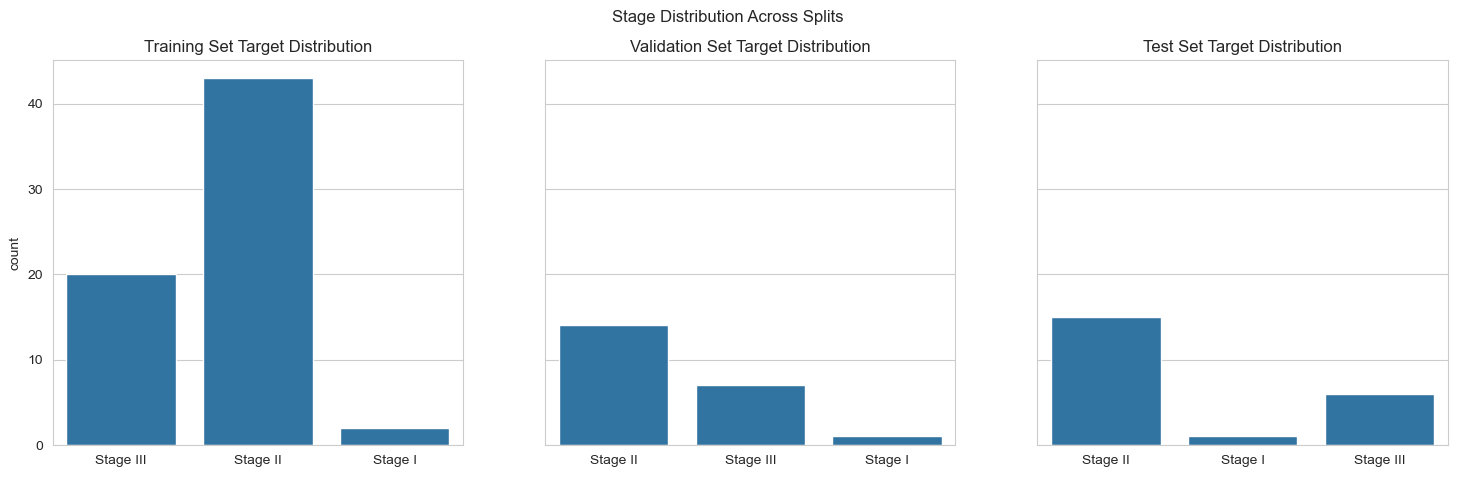

/var/folders/s2/dhw76k557cv4r_lsczbl6_qw0000gp/T/ipykernel_791/756267484.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


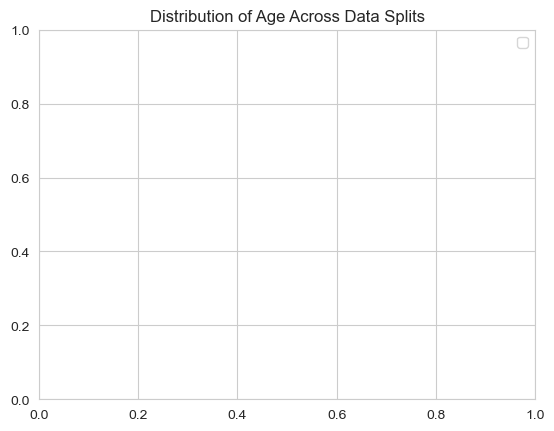

In [17]:
if 'df' in locals():
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    
    sns.countplot(x=y_train, ax=axes[0])
    axes[0].set_title('Training Set Target Distribution')

    sns.countplot(x=y_val, ax=axes[1])
    axes[1].set_title('Validation Set Target Distribution')

    sns.countplot(x=y_test, ax=axes[2])
    axes[2].set_title('Test Set Target Distribution')
    
    plt.suptitle('Stage Distribution Across Splits')
    plt.show()
    
    plt.title('Distribution of Age Across Data Splits')
    plt.legend()
    plt.show()

/var/folders/s2/dhw76k557cv4r_lsczbl6_qw0000gp/T/ipykernel_791/3744789490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = df_clean['Age'].astype(int)


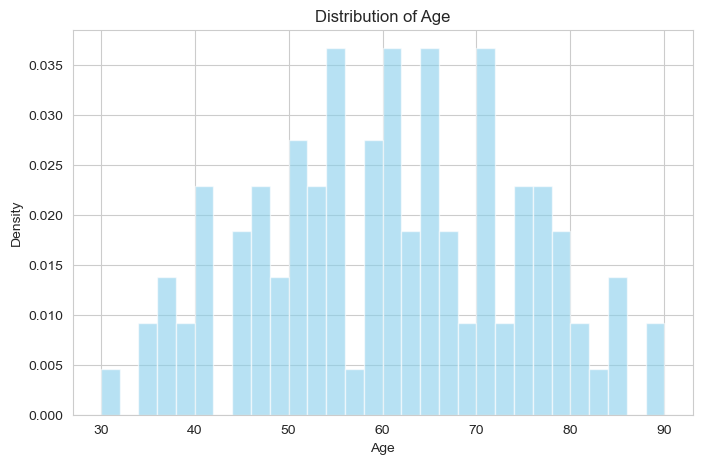

In [18]:
df_clean['Age'] = df_clean['Age'].astype(int)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_clean['Age'], bins=30, density=True, alpha=0.6, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## 9. Conclusion & Next Steps

This initial exploration has provided a foundational understanding of the CPTAC BRCA dataset. We have:
- Successfully loaded and merged the disparate data sources.
- Identified significant missingness in several clinical variables, which will require a robust imputation strategy.
- Observed the distribution of our example target variable, `PIK3CA_mutation`, and noted a class imbalance.
- Successfully split the data into stratified train, validation, and test sets, ensuring consistent distributions.

**Next Steps:**
1.  **Advanced Imputation:** Implement more sophisticated imputation techniques for missing data.
2.  **Feature Engineering & Selection:** Explore interactions between features and apply dimensionality reduction techniques (like PCA or UMAP) on the high-dimensional proteomics data.
3.  **Model Training:** Begin training baseline models as outlined in the research plan.

## 8. Predicting Overall Survival (OS) and Progression-Free Survival (PFS)

Now, let's tackle a regression problem: predicting the `OS_days` and `PFS_days`. We will use different regression models for this task.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for OS_days prediction
df_os = df_clean.dropna(subset=['OS_days']).copy()
X_os = df_os[feature_cols]
y_os = df_os['OS_days']

# Split data for OS prediction
X_os_train, X_os_temp, y_os_train, y_os_temp = train_test_split(X_os, y_os, test_size=0.3, random_state=42)
X_os_val, X_os_test, y_os_val, y_os_test = train_test_split(X_os_temp, y_os_temp, test_size=0.5, random_state=42)


# Prepare data for PFS_days prediction
df_pfs = df_clean.dropna(subset=['PFS_days']).copy()
X_pfs = df_pfs[feature_cols]
y_pfs = df_pfs['PFS_days']

# Split data for PFS prediction
X_pfs_train, X_pfs_temp, y_pfs_train, y_pfs_temp = train_test_split(X_pfs, y_pfs, test_size=0.3, random_state=42)
X_pfs_val, X_pfs_test, y_pfs_val, y_pfs_test = train_test_split(X_pfs_temp, y_pfs_temp, test_size=0.5, random_state=42)

print(f"OS prediction - Train set: {X_os_train.shape}, Test set: {X_os_test.shape}")
print(f"PFS prediction - Train set: {X_pfs_train.shape}, Test set: {X_pfs_test.shape}")

OS prediction - Train set: (66, 9242), Test set: (15, 9242)
PFS prediction - Train set: (66, 9242), Test set: (15, 9242)


In [21]:
# Train and evaluate models for OS_days prediction

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "SVR": SVR()
}

for name, model in models.items():
    print(f"--- {name} for OS_days ---")
    model.fit(X_os_train, y_os_train)
    y_pred = model.predict(X_os_test)
    mse = mean_squared_error(y_os_test, y_pred)
    r2 = r2_score(y_os_test, y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

--- Linear Regression for OS_days ---
MSE: 10719.44
R-squared: -0.71
--- Random Forest Regressor for OS_days ---
MSE: 9042.95
R-squared: -0.44
--- SVR for OS_days ---
MSE: 6490.29
R-squared: -0.03


In [22]:
# Train and evaluate models for PFS_days prediction

for name, model in models.items():
    print(f"--- {name} for PFS_days ---")
    model.fit(X_pfs_train, y_pfs_train)
    y_pred = model.predict(X_pfs_test)
    mse = mean_squared_error(y_pfs_test, y_pred)
    r2 = r2_score(y_pfs_test, y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("")

--- Linear Regression for PFS_days ---
MSE: 12643.44
R-squared: -1.02

--- Random Forest Regressor for PFS_days ---
MSE: 7833.68
R-squared: -0.25

--- SVR for PFS_days ---
MSE: 6486.51
R-squared: -0.04

